In [3]:
import numpy as np
import pandas as pd

In [4]:
bounds = np.array([
        [5, 10],  # Longitude bounds
        [0, 3],  # Latitude bounds
    ])

In [6]:
bounds[0][1]

np.int64(10)

In [7]:
data_file = r'../data/Map_village_20241227_data.csv'

In [8]:
def read_data(file_path):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    households = data[data['Type'] == 'Household']
    pumps = data[data['Type'] == 'Hand Pump']
    return data, households, pumps

In [9]:
data, households, pumps= read_data(data_file)

In [10]:
print(pumps)

          Type        Lon        Lat  Altitude  Nb capita  Drink  Cook  \
191  Hand Pump -11.433498  10.980816       372        NaN    NaN   NaN   
192  Hand Pump -11.444274  10.990651       350        NaN    NaN   NaN   
193  Hand Pump -11.420954  11.001941       350        NaN    NaN   NaN   

     Hygiene  Laundry  Usage  
191      NaN      NaN    NaN  
192      NaN      NaN    NaN  
193      NaN      NaN    NaN  


In [11]:
print(data['Lon'].mean(), data['Lat'].mean())

-11.43402127185567 10.991749958659796


In [12]:
nb_capita = households['Nb capita'].to_numpy()
print(nb_capita)

[ 6. 10.  7.  6.  5.  5.  4.  8.  7.  7.  3. 10.  8.  5.  5.  5.  5.  6.
  6.  5.  7.  4.  5.  6.  6.  7.  5.  6.  6.  3.  7.  5.  4.  9. 10.  8.
  5.  4.  7.  6.  4.  6.  3.  9.  5.  7.  5.  6.  6.  5. 10.  7.  9.  8.
  6.  9.  4.  5.  3.  5.  6.  5.  8.  6.  5.  6.  4.  8.  4. 10.  7.  5.
  3.  8.  7.  7.  7.  4.  6.  4.  8.  7.  5.  4.  5.  5.  7.  7.  8.  6.
  4.  7.  7.  6.  7.  6.  6.  6.  3.  4.  3.  7.  5.  6.  9.  5.  6.  7.
  5.  4.  5.  5.  9.  8.  7.  8.  8.  5.  8.  6.  8.  8.  5.  4.  5.  6.
  8.  8.  3.  6.  6.  5.  4.  5.  9.  5.  6.  7.  6. 10. 10.  5.  6.  5.
  5.  3.  7.  6.  4.  5.  9.  5.  4.  6. 10.  5.  7.  7.  5.  7.  6.  7.
  7.  6.  4.  8.  5.  5.  3.  6.]


In [13]:
pos_households = households[['Lon','Lat']].to_numpy() # For f1 (sum of weighted distances)
nb_capita = households['Nb capita'].to_numpy() # Define weight factors for each distance in pos_households
pos_pumps = pumps[['Lon','Lat']].to_numpy() # For f2 (min distance)

In [14]:
import geopy.distance as geo

In [ ]:
def impact(pump_positions, x = None):
    pump_positions_copy = pump_positions.copy()
    if x == None:
        pass
    else:
        pump_positions_copy = np.concatenate((pump_positions_copy,np.array([x])),axis = 0)
    min_pump_distance = np.zeros(len(households))
    for index,household in households.iterrows():
        dist = np.zeros(len(pump_positions_copy))
        for i,pump_pos in enumerate(pump_positions_copy):
            dist[i] = geo.great_circle(pump_pos, pos_households[index]).meters
        min_pump_distance[index] = np.min(dist)

    impact = np.sum(nb_capita * (min_pump_distance))
    return impact, min_pump_distance

: 

: 

: 

In [15]:
y = np.array([[-11.44,11]])
np.concatenate((pos_pumps,y), axis = 0)

array([[-11.43349811,  10.98081621],
       [-11.44427405,  10.99065103],
       [-11.42095355,  11.00194111],
       [-11.44      ,  11.        ]])

In [16]:
h = np.array([1,1])
print(type(h))
print(type(h) == 'NoneType')

<class 'numpy.ndarray'>
False


In [17]:
impact_added, min_dist_added = impact(pos_pumps,[-11.44,11.00])
impact_init, min_dist_init = impact(pos_pumps)


NameError: name 'impact' is not defined

In [ ]:
print(impact_init,impact_added)

378484.27633823245 368029.0347251879


: 

: 

: 

In [ ]:
data_dist = np.column_stack((min_dist_init,min_dist_added))

: 

: 

: 

In [18]:
data_dist = np.column_stack((min_dist_init,min_dist_added))
df = pd.DataFrame(data_dist,columns=['init','added'])

NameError: name 'min_dist_init' is not defined

In [19]:
counter = 0
for i,dist in df.iterrows():
    if dist.iloc[0] == dist.iloc[1]:
        counter +=1
    else:
        pass
print(counter)

NameError: name 'df' is not defined

In [20]:
df

NameError: name 'df' is not defined

In [21]:
import matplotlib.pyplot as plt

In [22]:
def impact(pump_positions, x = None):
    pump_positions_copy = pump_positions.copy()
    if isinstance(x, np.ndarray):
        pump_positions_copy = np.concatenate((pump_positions_copy,np.array([x])),axis = 0)
    min_pump_distance = np.zeros(len(households))
    for index,household in households.iterrows():
        dist = np.zeros(len(pump_positions_copy))
        for i,pump_pos in enumerate(pump_positions_copy):
            dist[i] = geo.great_circle(pump_pos, pos_households[index]).meters
        min_pump_distance[index] = np.min(dist)

    impact = np.sum(nb_capita * (min_pump_distance))
    return -1*impact, min_pump_distance

In [23]:
new_pump= np.array([-11.43184669,  10.98180143])
impact_new,dist_new = impact(pos_pumps,new_pump)

In [24]:
print(impact_new)

-532447.8464667689


In [25]:
print(new_pump,pos_pumps[-3])

[-11.43184669  10.98180143] [-11.43349811  10.98081621]


In [26]:
data_dist = np.column_stack((min_dist_init,dist_new))
df = pd.DataFrame(data_dist,columns=['init','added'])

NameError: name 'min_dist_init' is not defined

In [27]:
counter = 0
err = 5
for i,dist in df.iterrows():
    if dist.iloc[0] <= dist.iloc[1]+err and dist.iloc[0] >= dist.iloc[1]-err:
        counter +=1
    else:
        pass
print(counter,len(df))

NameError: name 'df' is not defined

In [28]:
print(impact_new)

-532447.8464667689


In [29]:
y = np.array([[-11.4378666,  10.99908537]])
pos_pumps = np.concatenate((pos_pumps,y), axis = 0)

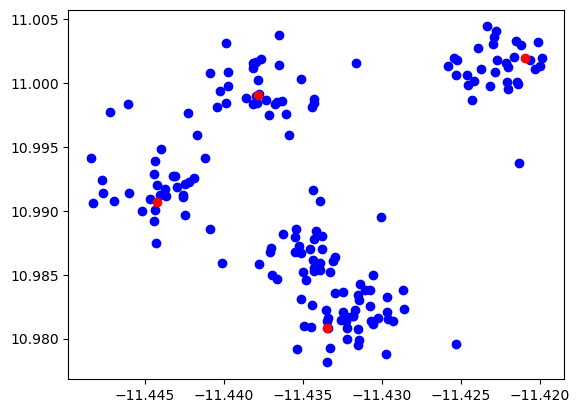

In [30]:
plt.scatter(households['Lon'].to_numpy(), households['Lat'].to_numpy(), c='blue', label='Household')
plt.scatter(pos_pumps[:,0],pos_pumps[:,1],c='red',label='pump')

plt.show()

In [31]:
def impact(pump_positions, household_positions, household_capita, max_dist, x = None):
    pump_positions_copy = pump_positions.copy()
    if isinstance(x, np.ndarray):
        pump_positions_copy = np.concatenate((pump_positions_copy,np.array([x])),axis = 0)
    within_max_distance = np.zeros(len(household_positions))
    for index,pos_houseshold in enumerate(household_positions):
        dist = np.zeros(len(pump_positions_copy))
        for i,pump_pos in enumerate(pump_positions_copy):
            dist[i] = geo.great_circle(pump_pos, household_positions[index]).meters
        if np.min(dist) <= max_dist:
            within_max_distance[index] = 1
        else:
            within_max_distance[index] = 0

    impact = np.sum(household_capita * (within_max_distance))
    return -1*impact

In [ ]:
max_distance = 500
initial_impact = impact(pos_pumps,pos_households,nb_capita,max_distance)
change_impact = impact(pos_pumps,pos_households,nb_capita,max_distance,[-11.4378666,  10.99908537])
print(initial_impact,change_impact)

-759.0
